# Simple Regression 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np



In [2]:
automobile_df= pd.read_csv("datasets/auto-mpg-processed.csv")

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,23.0,4,120.0,97,2506,14.5,52
1,26.0,4,121.0,113,2234,12.5,54
2,15.0,8,400.0,150,3761,9.5,54
3,25.4,6,168.0,116,2900,12.6,43
4,19.0,6,250.0,88,3302,15.5,53


## Let's start with one Feature


Normalization Scales all numeric features to be between 0 and 1 . 

Having the Features in the same scale improve the performance of the model

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaller= MinMaxScaler()
X= automobile_df['horsepower'].values.reshape(-1,1)
Y= automobile_df['mpg']

X_normalized= scaller.fit_transform(X)

x_train, x_test, y_train, y_test= train_test_split(X_normalized,Y,test_size=0.2)

In [4]:
x_train[:5]

array([[0.64673913],
       [0.23913043],
       [0.32065217],
       [0.5923913 ],
       [0.22826087]])

In [5]:
from sklearn.linear_model import LinearRegression

linear_model= LinearRegression().fit(x_train,y_train)

In [6]:
print("Training Score : ",linear_model.score(x_train,y_train))

Training Score :  0.6180349662162975


In [7]:
y_pred= linear_model.predict(x_test)

In [8]:
from sklearn.metrics import r2_score

print("Testing Score", r2_score(y_test,y_pred))

Testing Score 0.5217010289018225


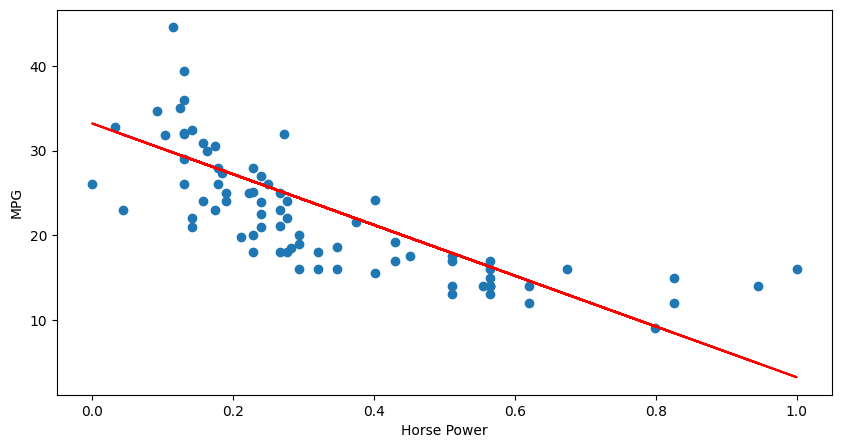

In [9]:
fig, ax= plt.subplots(figsize=(10,5))

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')

plt.xlabel('Horse Power')
plt.ylabel("MPG")

plt.show()

## Let's Try another ONe Feature

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaller= MinMaxScaler()
X= automobile_df['age'].values.reshape(-1,1)
Y= automobile_df['mpg']

X_normalized= scaller.fit_transform(X)

x_train, x_test, y_train, y_test= train_test_split(X_normalized,Y,test_size=0.2)
linear_model= LinearRegression().fit(x_train,y_train)

print("Training Score : ",linear_model.score(x_train,y_train))
y_pred= linear_model.predict(x_test)
print("Testing Score", r2_score(y_test,y_pred))

Training Score :  0.36491542375338293
Testing Score 0.21902021809920103


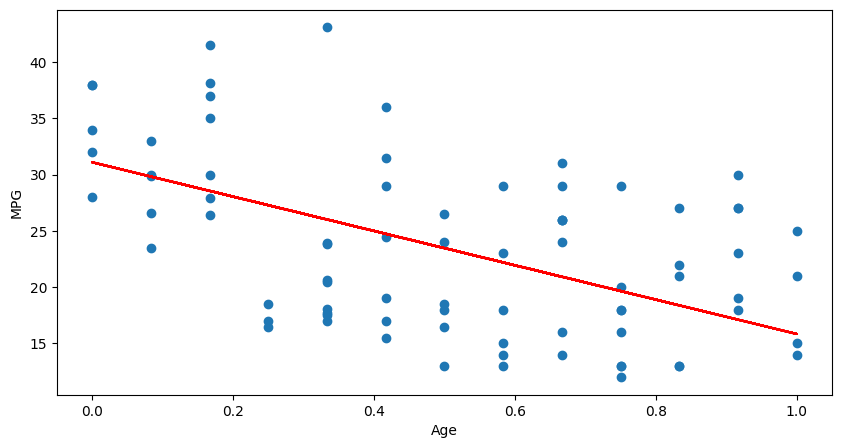

In [11]:
fig ,ax = plt.subplots(figsize=(10,5))

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')

plt.xlabel('Age')
plt.ylabel("MPG")

plt.show()

## Linear Regression with Multiple Feature

The Experment will be just on 3 features

In [15]:
X= automobile_df[['displacement','horsepower','weight']]
Y= automobile_df['mpg']

X_normalized= scaller.fit_transform(X)

x_train, x_test, y_train, y_test= train_test_split(X_normalized,Y,test_size=0.2)

In [20]:
x_train[:5]

array([[0.05943152, 0.13043478, 0.09696626],
       [0.49612403, 0.23913043, 0.51233343],
       [0.13436693, 0.22826087, 0.38106039],
       [0.01033592, 0.125     , 0.        ],
       [0.49095607, 0.34782609, 0.60022682]])

In [21]:
linear_model= LinearRegression().fit(x_train,y_train)

In [23]:
print(f"Training Score : {linear_model.score(x_train,y_train)}")
print(f"Test Score : {linear_model.score(x_test,y_test)}")

Training Score : 0.702744610792142
Test Score : 0.717162813026853


In [29]:
predictions=['displacement','horsepower','weight']

coef= pd.Series(linear_model.coef_,predictions).sort_values()

print(coef)


weight         -17.993992
horsepower      -7.790079
displacement    -2.658470
dtype: float64


The all coef negative values, Indicate that the values of this features Increase the mileage of the car tends to go down

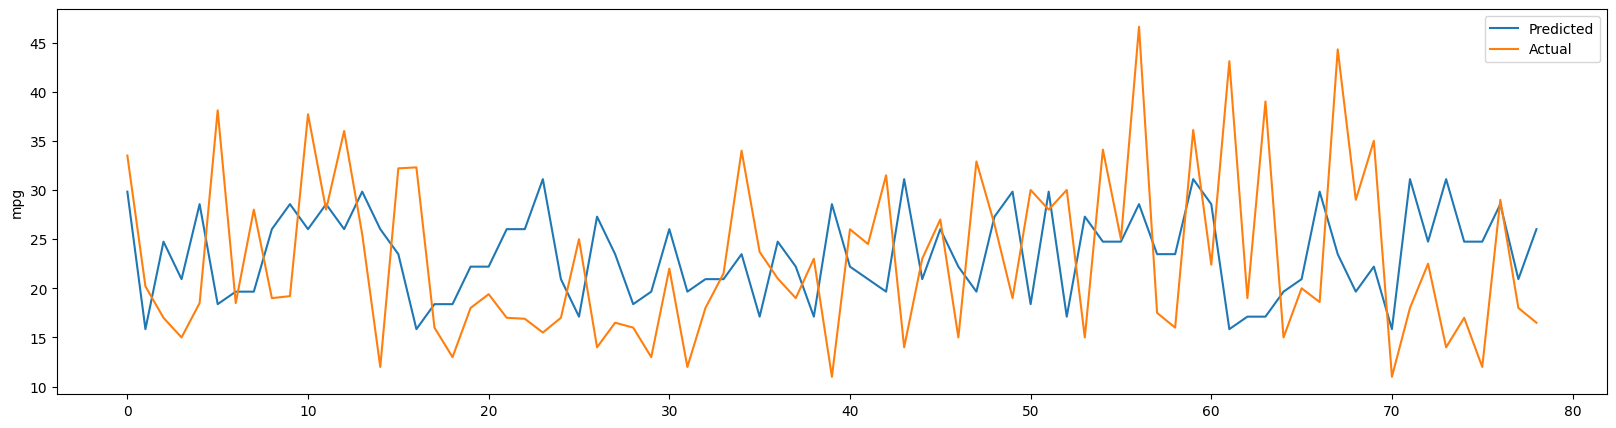

In [33]:
plt.figure(figsize=(20,5))

plt.plot(y_pred,label="Predicted")
plt.plot(y_test.values,label="Actual")

plt.ylabel("mpg")

plt.legend()
plt.show()

> NOTE : The more Features we add, the more better model we got

so Let's try our all features

## Linear Regression with All Our Features

In [34]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,23.0,4,120.0,97,2506,14.5,52
1,26.0,4,121.0,113,2234,12.5,54
2,15.0,8,400.0,150,3761,9.5,54
3,25.4,6,168.0,116,2900,12.6,43
4,19.0,6,250.0,88,3302,15.5,53


In [ ]:
X= automobile_df[['displacement','horsepower','weight','acceleration','age']]
Y= automobile_df['mpg']

X_normalized= scaller.fit_transform(X)

x_train, x_test, y_train, y_test= train_test_split(X_normalized,Y,test_size=0.2)
linear_model= LinearRegression().fit(x_train,y_train)

In [38]:
print(f"Training Score : {linear_model.score(x_train,y_train)}")


Training Score : 0.8129525495476262


In [37]:
predictions=['displacement','horsepower','weight','acceleration','age']

coef= pd.Series(linear_model.coef_,predictions).sort_values()

print(coef)

weight         -26.042719
age             -9.345725
horsepower       0.514599
acceleration     2.698605
displacement     3.287115
dtype: float64


In [39]:
y_pred= linear_model.predict(x_test)
print(f"Test Score : {r2_score(y_test,y_pred)}")

Test Score : 0.7874568392313619


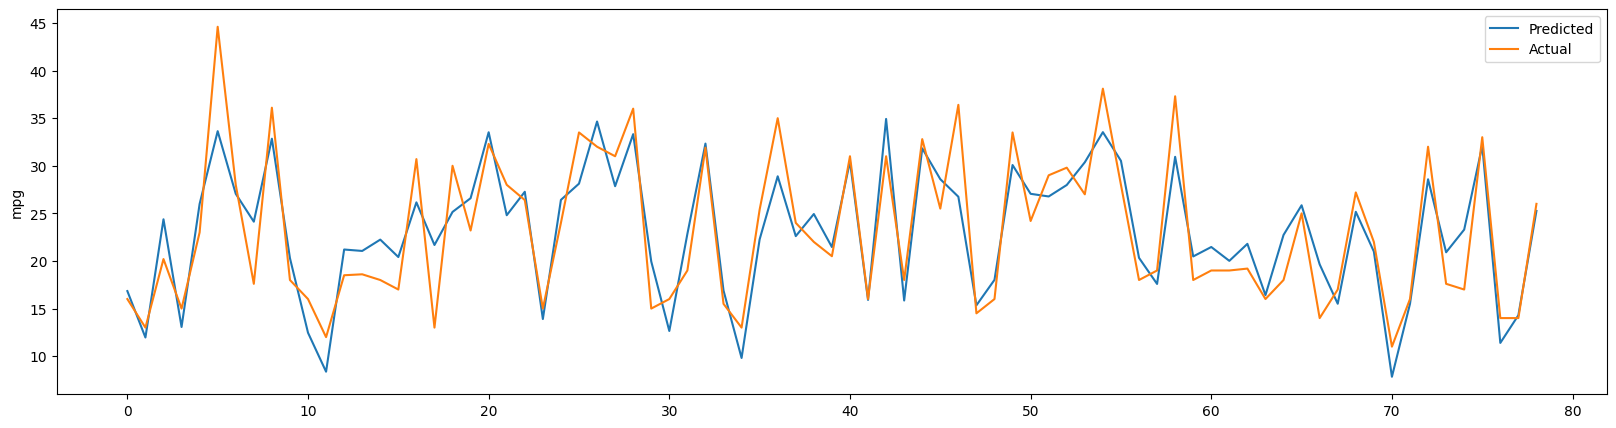

In [40]:
plt.figure(figsize=(20,5))

plt.plot(y_pred,label="Predicted")
plt.plot(y_test.values,label="Actual")

plt.ylabel("mpg")

plt.legend()
plt.show()